## Mostly Harmless Convolutional Neural Networks (CNNs)

Author: *Kaiyan Zhang, PRAXIS UBC Team*

Date: 2025-06

**Before you begin: Install the dependencies that you don't have by running the code cell below.**

In [1]:
# !pip install opencv-python
# !pip install numpy
# !pip install matplotlib
# !pip install pandas
# !pip install scikit-learn
# !pip install seaborn
# !pip install datasets
# !pip install torch
# !pip install tqdm

<img src="data/CNN_example.jpg" alt="A visual explanation of CNN" width="800"/>

### What are Neural Networks?

What is the first thing that comes to your mind when you hear the word "**neural network**"? If you are thinking about the human brain and neurons, you are not wrong. In fact, the term "neural network" is inspired by the way how human brain and nervous systems work, where neurons are connected to each other and communicate with each other to process information. 

In the context of **machine learning**, a neural network, or more precisely, an **artificial neural network (ANN)** is defined as "a program, or model, that makes decisions in a manner similar to the human brain, by using processes that mimic the way biological neurons work together to identify phenomena, weigh options and arrive at conclusions".

The definition seems way too formal and scientific, but we can easily translate it into daily language. Think of taking a closed-book multiple choice exam (Oops, gross). Your brain calls on a team of "experts", one for course facts, another for what you remember about the professor's hints in class, another for gut instincts, etc. When you read a question, each expert gives you a confidence score. You weight each score by how much you trust that expert, then add them up. The answer with the highest total "trust $\times$ confidence" wins. After the exam, you see which answers were wrong and adjust those trust weights (trust the right experts more, the wrong ones less), and prepare for the next exam based on this experience. This exactly how a neural network makes decisions and learns via its **feedback loop**. Neural networks are following a similar thought and learning process as you and me, and this is why they are flexible and powerful, being able to handle complex, abstract tasks and evolve on their own, **like an intelligent creature**. 

While the core idea is not complex, you may want to master some bluffing terms to translate the professional discussions. In the example above, the "experts" you consulted in your mind are called **neurons**; the key clues you noticed when reading question are called **features**; your understanding of exam question is called the **input layer**; your thought process rounds are called **hidden layers**; your chosen answer is reflected as the **output layer**; the mind map that connects all the "experts" and input features is **architecture**; and each exam attempt with the review of feedback is called a **training epoch**. See, they are really not that deep! You now can also talk about it as an expert.

### An Intuitive Understanding of Convolutional Neural Networks (CNNs)

Now that we understood what is an artificial neural network, let's dive into the real topic here: What's unique about **convolutional neural networks (CNNs)** and why they are revolutionary to computer vision and image processing? 

Let's start by discussing the unique point of CNNs. Imagine you are reading a bird guide and trying to learn the characteristics of a night heron and a grey heron so that you can easily distinguish between the two in the field, what would you do? I believe you would naturally try to observe the birds piece by piece: first comparing the features of the juveniles and adults, then noting how they look both in flight and on land. Gradually, your brain forms a complete comparison: the night heron has a shorter beak, a shorter neck, striking red eyes, and dark blue plumage as an adult; while the grey heron has a longer beak, a longer neck, yellow eyes, and wears grey color plumage. 

<p align="center">
  <figure style="display:inline-block; margin:10px;">
    <img src="data/night_heron.jpg" alt="A night heron" width="300"/>
    <figcaption style="text-align:center;">Night heron in a bird guide</figcaption>
  </figure>

  <figure style="display:inline-block; margin:10px;">
    <img src="data/grey_heron.jpg" alt="A grey herom" width="370"/>
    <figcaption style="text-align:center;">Grey heron in a bird guide</figcaption>
  </figure>
</p>

A convolutional neural network would read things in the same way, as it doesn't look at things in a big picture directly (which is usually costly and slow), but would see an image as multiple small **patches** to study the unique features and construct a detailed field guide of its own. The way how a CNN sees things this way is through **convolution**: it has a **convolutional layer** on top of the input layer to learn features piece by piece in its architecture, such that it can process information from an image in a cleverer way. Moreover, CNNs work quite well even when training images are not as tidy and organized as those in a field guide, which makes it efficient in solving real-life problems. 

Let's recall some basic concepts of convolution and see how they are applied in the CNNs, typically within the convolutional layer. Here, the **inputs** are images, and they are interpreted by a computer as grids of numbers. The **kernels** (also called filters) are still the "brushes" you apply on the input image to extract certain features, but in a CNN, there are usually multiple distinct kernels applied at the same time to extract and map different features. After different features are extracted, they will be pooled together with another kernel and produce a summarized output to be passed into the **fully-connected layer** for classification or other tasks.

While the principles behind the architectures are complicated, many python libraries now offer easy ways to implement these architectures. In a word, with a labeled image dataset, you can also train a CNN classifier yourself. Let's try out an example together.

### (Optional) Build Our Own CNN Classifier: An Example Using CIFAR-10 Dataset

Classifying is central in the application of CNNs, so let's try building a classifier using CNN and see how it works with an example. Let's say, we want to train a model (the "expert") that identify and distinguish between some daily objects, such as cars, planes, cat, dogs, etc. We first need to find a dataset that contains images of these objects with labels. **This is usually hard as we wouldn't always have clean, labelled datasets of a specific topic**. But luckily, we have many datasets for daily objects.

The dataset we are using here is [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html), it is a widely used practice dataset for beginners to image processing that consists of 60000 32 $\times$ 32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Let's first load the dataset and see what it's like.

#### Step 1: Data Preprocessing

In [8]:
# import CIFAR-10 dataset from HuggingFace
from datasets import load_dataset

dataset_train = load_dataset(
    'cifar10',
    split='train'# training dataset
)

dataset_train

Dataset({
    features: ['img', 'label'],
    num_rows: 50000
})

In [9]:
# check how many labels/number of classes
num_classes = len(set(dataset_train['label']))
num_classes

10

We can also display one of the images to see what it's like.

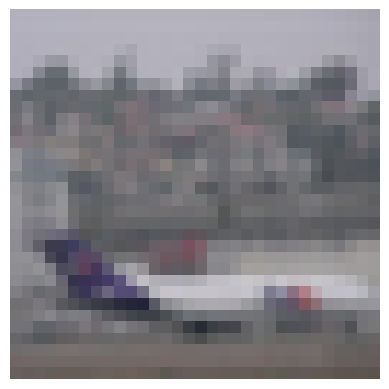

In [10]:
# let's view the image (it's very small)
sample = dataset_train[0]['img']

plt.imshow(sample)
plt.axis('off')
plt.show()

Can you see what the image is about? Can you imagine how computers understands it?

As most CNNs can only accept images of a fixed size, we will reshape all images to 32 $\times$ 32 pixels using `torchvision.transforms`; a **pipeline** built for image preprocessing. You can think of a pipeline as a series of small programs that together handles a specific task in a sequential order, which in here is resizing the images in the training set.

In [11]:
import torchvision.transforms as transforms
from tqdm.auto import tqdm

# image size
img_size = 32

# preprocess variable, to be used ahead
preprocess = transforms.Compose([
    transforms.Resize((img_size,img_size)),
    transforms.ToTensor()
])

inputs_train = []

for record in tqdm(dataset_train):
    image = record['img']
    label = record['label']

    # convert from grayscale to RGB
    if image.mode == 'L':
        image = image.convert("RGB")
        
    # prepocessing
    input_tensor = preprocess(image)
    
    # append to batch list
    inputs_train.append([input_tensor, label]) 

  0%|          | 0/50000 [00:00<?, ?it/s]

Other than normalizing the general size of the images, we should also normalize the pixel values in the dataset.

In [12]:
mean = [0.4670, 0.4735, 0.4662]
std = [0.2496, 0.2489, 0.2521]

preprocess = transforms.Compose([
    transforms.Normalize(mean=mean, std=std)
])

for i in tqdm(range(len(inputs_train))):
    # prepocessing
    input_tensor = preprocess(inputs_train[i][0])
    # replace with normalized tensor
    inputs_train[i][0] = input_tensor

  0%|          | 0/50000 [00:00<?, ?it/s]

Here, we load and process the training set that we are using to validate the model quality.

In [13]:
# Loading the dataset
dataset_val = load_dataset(
    'cifar10',
    split='test'  # test set (used as validation set)
)

# Integrate the preprocessing steps
preprocess = transforms.Compose([
    transforms.Resize((img_size,img_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

inputs_val = []
i = 0
for record in tqdm(dataset_val):
    image = record['img']
    label = record['label']

    # convert from grayscale to RBG
    if image.mode == 'L':
        image = image.convert("RGB")
        
    # prepocessing
    input_tensor = preprocess(image)
    inputs_val.append((input_tensor, label)) # append to batch list

  0%|          | 0/10000 [00:00<?, ?it/s]

We noticed that the testing and training data are gigantic in size, which would lag our trainings. To avoid the long training time and huge training cost, we often need to split our data into multiple small **batches**. 

In CNN training, choosing a batch size of, say, 32 or 64 gives you the best of both worlds: you "study" small, manageable mini-quizzes, get regular feedback to adjust your filter-weights, and keep your compute requirements reasonable, all while learning robustly across the entire image dataset.

In [14]:
import torch

# Given the amount of data, we set the batch size as 64 to improve the efficiency when running our model
batch_size = 64

# We use DataLoader to split both the training and validation dataset into shuffled batches. 
# Shuffle helps prevent model overfitting by ensuring that batches are more representative of the entire dataset.
dloader_train = torch.utils.data.DataLoader(
    inputs_train, batch_size=batch_size, shuffle=True
)

dloader_val = torch.utils.data.DataLoader(
    inputs_val, batch_size=batch_size, shuffle=False
)

#### Step 2: Training the CNN Classifier

After carefully processing both the training and the test data, we finally came to a stage where we can train our own CNN classifier. The first thing we need to do is to decide which **architecture** we want to use for the model.

Architecture determines the way how a CNN integrate and learn from the features it extracted, and thus largely determines the performance of a model. Throughout the years, there have been several hugely successful CNN architectures, which we won't be able to discuss in detail. Here, I will only demonstrate the architecture of **LeNet-5**: It reads images in a sequence that starts with a partial and combines the partials into a comprehensive one. Intuitively, the learning process of this architecture can be thought as learning to write a new character: You learn to write each stroke first, and then follow the structure of the character to put those strokes together into a complete character.

<img src="data/lenet5.png" alt="A visual comparison of two neural networks" width="700"/>

In [15]:
import torch.nn as nn

# creating a CNN class
class ConvNeuralNet(nn.Module):
	#  determine what layers and their order in CNN object 
    def __init__(self, num_classes):
        super(ConvNeuralNet, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=4, padding=1)
        self.relu1 = nn.ReLU()
        self.max_pool1 = nn.MaxPool2d(kernel_size=3, stride=2)

        self.conv_layer2 = nn.Conv2d(in_channels=64, out_channels=192, kernel_size=4, padding=1)
        self.relu2 = nn.ReLU()
        self.max_pool2 = nn.MaxPool2d(kernel_size=3, stride=2)

        self.conv_layer3 = nn.Conv2d(in_channels=192, out_channels=384, kernel_size=3, padding=1)
        self.relu3 = nn.ReLU()
        
        self.conv_layer4 = nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, padding=1)
        self.relu4 = nn.ReLU()

        self.conv_layer5 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        self.relu5 = nn.ReLU()
        self.max_pool5 = nn.MaxPool2d(kernel_size=3, stride=2)
        
        self.dropout6 = nn.Dropout(p=0.5)
        self.fc6 = nn.Linear(1024, 512)
        self.relu6 = nn.ReLU()
        self.dropout7 = nn.Dropout(p=0.5)
        self.fc7 = nn.Linear(512, 256)
        self.relu7 = nn.ReLU()
        self.fc8 = nn.Linear(256, num_classes)
    
    # progresses data across layers    
    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.relu1(out)
        out = self.max_pool1(out)
        
        out = self.conv_layer2(out)
        out = self.relu2(out)
        out = self.max_pool2(out)

        out = self.conv_layer3(out)
        out = self.relu3(out)

        out = self.conv_layer4(out)
        out = self.relu4(out)

        out = self.conv_layer5(out)
        out = self.relu5(out)
        out = self.max_pool5(out)
        
        out = out.reshape(out.size(0), -1)
        
        out = self.dropout6(out)
        out = self.fc6(out)
        out = self.relu6(out)

        out = self.dropout7(out)
        out = self.fc7(out)
        out = self.relu7(out)

        out = self.fc8(out)  # final logits
        return out

After designing the network architecture, we initialize it. And if we have access to hardware acceleration (through CUDA or MPS), we move the model to that device to speed up the training. 

In [16]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
# set the model to device
model = ConvNeuralNet(num_classes).to(device)

Next, we will set the loss and optimizer function used during the training. These are the factors that determine how much your network learn from the mistakes and adjust the distribution of weights how it trust the "experts". 

The **loss function** is a metric that measures the classification performance. Here the Cross-Entropy Loss function is one of them that is commonly used in neural networks. The **optimizer function drives** the model to reflect and adjust its weights after each validation, and its parameter **learning rate** decides how much the model absorb from the lessons. While it seems that a higher learning rate is beneficial, it is actually not as a high learning rate could lead to severe overshooting. That's why we set the learning rate `lr = 0.01` here to prevent overly progressive learning.

In [17]:
# set loss function
loss_func = nn.CrossEntropyLoss()
# set learning rate 
lr = 0.01
# set optimizer as SGD
optimizer = torch.optim.SGD(
    model.parameters(), lr=lr
) 

We will train the model for 25 epochs. To ensure we’re not overfitting to the training set, we pass the validation set through the model for inference only at the end of each epoch. If we see validation set performance suddenly degrade while train set performance improves, we are likely overfitting.

You can run the training and fitting loop as follows, but **be cautious: This cell will take a long time to run**. Alternatively, you can skip 3 cells and load the model we pre-trained directly.

In [18]:
train_losses = []
val_losses = []
val_accuracies = []

num_epochs = 25
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for i, (images, labels) in enumerate(dloader_train):  
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss = loss_func(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    avg_train_loss = running_loss / len(dloader_train)
    train_losses.append(avg_train_loss)
    
    with torch.no_grad():
        model.eval()
        correct = 0
        total = 0
        all_val_loss = []
        for images, labels in dloader_val:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            total += labels.size(0)
            predicted = torch.argmax(outputs, dim=1)
            correct += (predicted == labels).sum().item()
            all_val_loss.append(loss_func(outputs, labels).item())
            
        mean_val_loss = sum(all_val_loss) / len(all_val_loss)
        mean_val_acc = 100 * (correct / total)
        
        val_losses.append(mean_val_loss)
        val_accuracies.append(mean_val_acc)
        
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {mean_val_loss:.4f}, Val Acc: {mean_val_acc:.2f}%')

Epoch [1/25], Train Loss: 2.3021, Val Loss: 2.3001, Val Acc: 13.34%
Epoch [2/25], Train Loss: 2.2898, Val Loss: 2.2234, Val Acc: 17.42%
Epoch [3/25], Train Loss: 2.0538, Val Loss: 1.9328, Val Acc: 23.68%
Epoch [4/25], Train Loss: 1.8942, Val Loss: 1.8471, Val Acc: 26.64%
Epoch [5/25], Train Loss: 1.7916, Val Loss: 1.8081, Val Acc: 31.44%
Epoch [6/25], Train Loss: 1.6934, Val Loss: 1.6122, Val Acc: 38.49%
Epoch [7/25], Train Loss: 1.5806, Val Loss: 1.5241, Val Acc: 41.75%
Epoch [8/25], Train Loss: 1.4779, Val Loss: 1.7349, Val Acc: 38.25%
Epoch [9/25], Train Loss: 1.3871, Val Loss: 1.3291, Val Acc: 50.46%
Epoch [10/25], Train Loss: 1.2993, Val Loss: 1.3906, Val Acc: 47.77%
Epoch [11/25], Train Loss: 1.2242, Val Loss: 1.2780, Val Acc: 51.84%
Epoch [12/25], Train Loss: 1.1526, Val Loss: 1.3043, Val Acc: 53.84%
Epoch [13/25], Train Loss: 1.0791, Val Loss: 1.0770, Val Acc: 61.68%
Epoch [14/25], Train Loss: 1.0063, Val Loss: 1.3263, Val Acc: 53.47%
Epoch [15/25], Train Loss: 0.9457, Val Loss

We can visualize how training loss, validation loss and validation accuracy evolve over time.

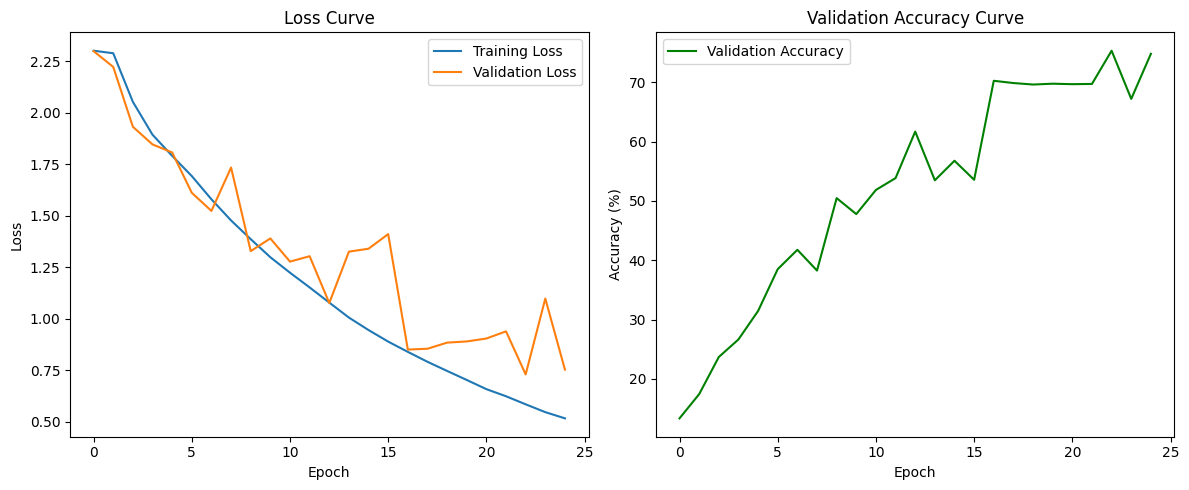

In [19]:
plt.figure(figsize=(12,5))

# Plot Loss
plt.subplot(1,2,1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Plot Accuracy
plt.subplot(1,2,2)
plt.plot(val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

The loss curve and validation accuracy curve show that the training loss and validation loss goes down while the validation accuracy of the model goes up as the training epochs increase. If we add more epochs (costly!), the validation accuracy of the model will be higher, but the model will also be more at risk of overfitting. To prevent which, we often need to regularize the model.

After training for 25 epochs, we see our validation accuracy has passed 70%, we can save the model to file and load it again with the following codes:

In [20]:
# save to file
torch.save(model, 'cnn.pt')

In [21]:

# load from file and switch to inference mode
model = torch.load('cnn.pt', weights_only=False)
model.eval()

ConvNeuralNet(
  (conv_layer1): Conv2d(3, 64, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (max_pool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_layer2): Conv2d(64, 192, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (max_pool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_layer3): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (conv_layer4): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu4): ReLU()
  (conv_layer5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu5): ReLU()
  (max_pool5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout6): Dropout(p=0.5, inplace=False)
  (fc6): Linear(in_features=1024, out_features=512, bias=True)
  (relu6): ReLU()
  (dropout7): Dropout(p=0.5, inplace=False)
  (fc7): Linear(in_features=512, ou

#### Step 3: Inference the Classifier

Now, we can use the trained classifier to predict the labels of the new input. But here, we are just using the test set for validation (which is not recommended).

In [22]:
input_tensors = []

for image in dataset_val['img'][:10]:
    tensor = preprocess(image)
    input_tensors.append(tensor.to(device))

# stack into a single tensor
input_tensors = torch.stack(input_tensors)
input_tensors.shape

torch.Size([10, 3, 32, 32])

In [23]:
# process through model to get output logits
outputs = model(input_tensors)
# calculate predictions
predicted = torch.argmax(outputs, dim=1)
predicted

# here are the class names
dataset_val.features['label'].names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

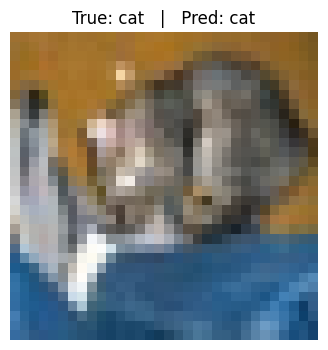

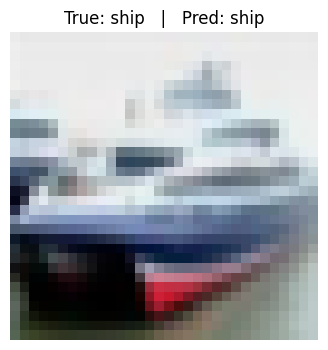

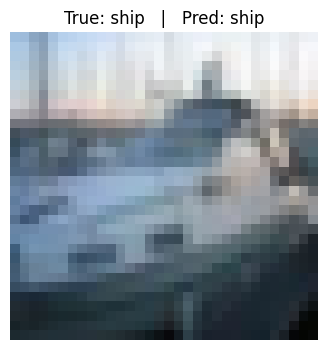

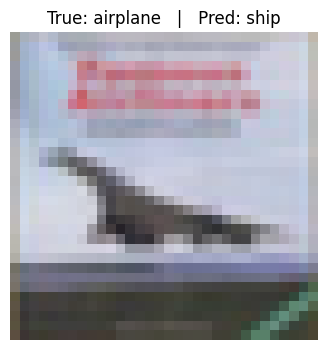

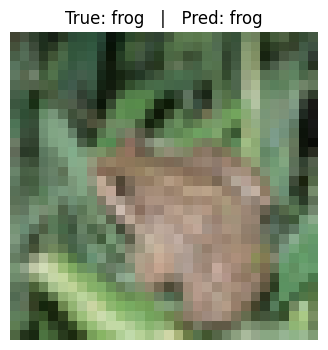

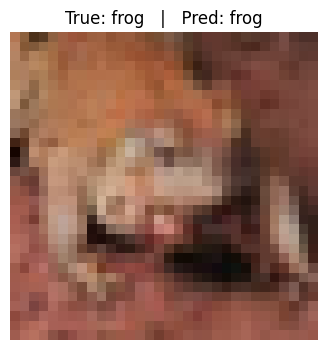

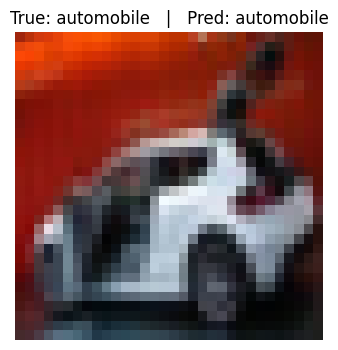

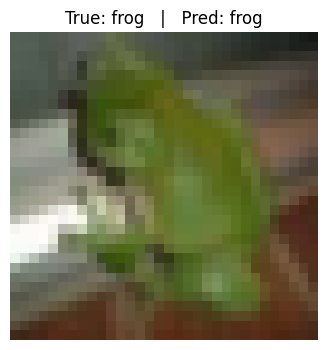

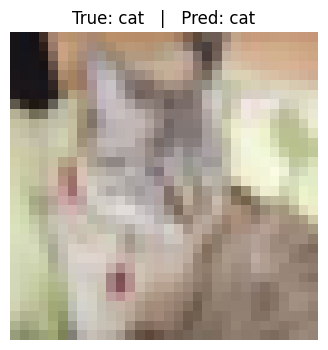

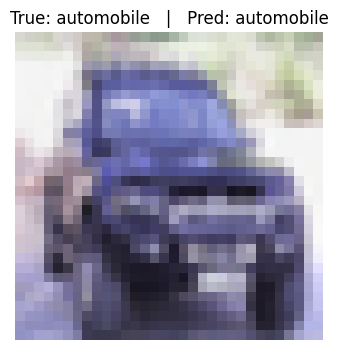

In [24]:
# Print out the output label and the true label
for i in range(10):
    example = dataset_val[i]           # get the i-th example as a dict
    image   = example['img']
    true_id = example['label']
    pred_id = predicted[i]
    
    true_label = dataset_val.features['label'].names[true_id]
    pred_label = dataset_val.features['label'].names[pred_id]
    
    plt.figure(figsize=(4,4))
    plt.imshow(image)
    plt.title(f"True: {true_label}   |   Pred: {pred_label}")
    plt.axis('off')
    plt.show()


We can visualize the feature maps at different layers to see how the CNN see images.

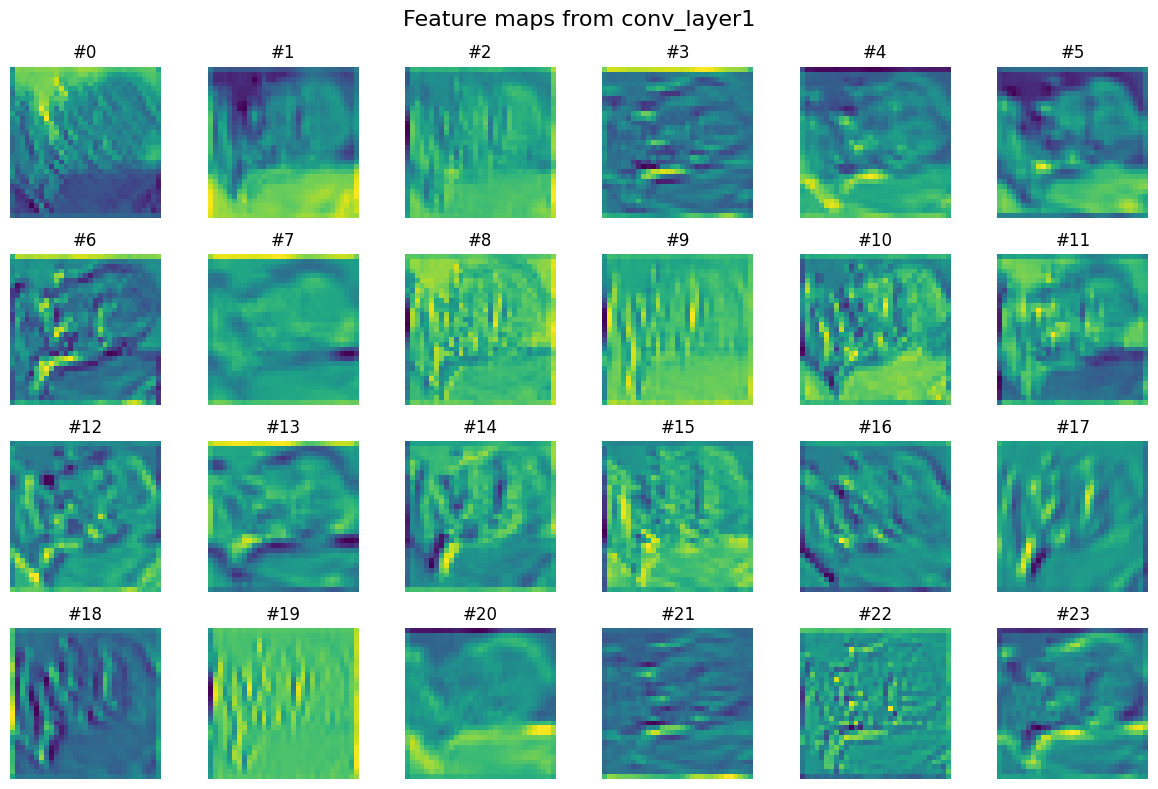

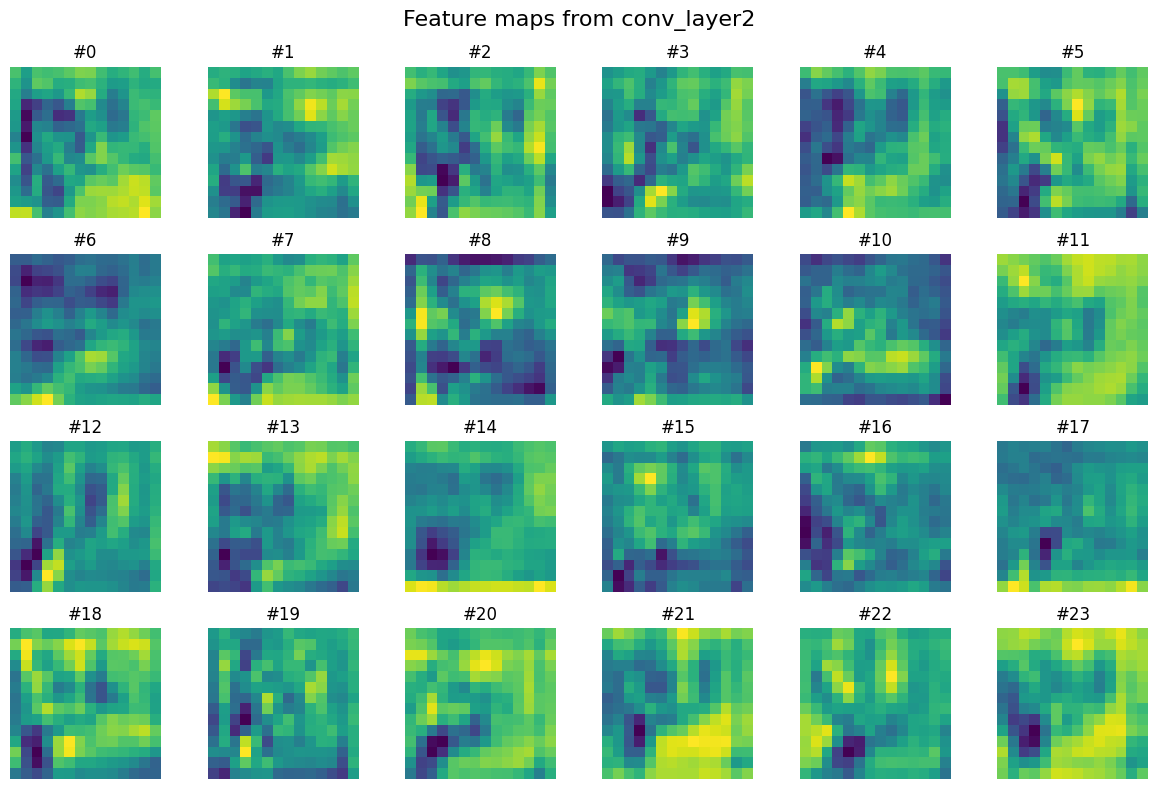

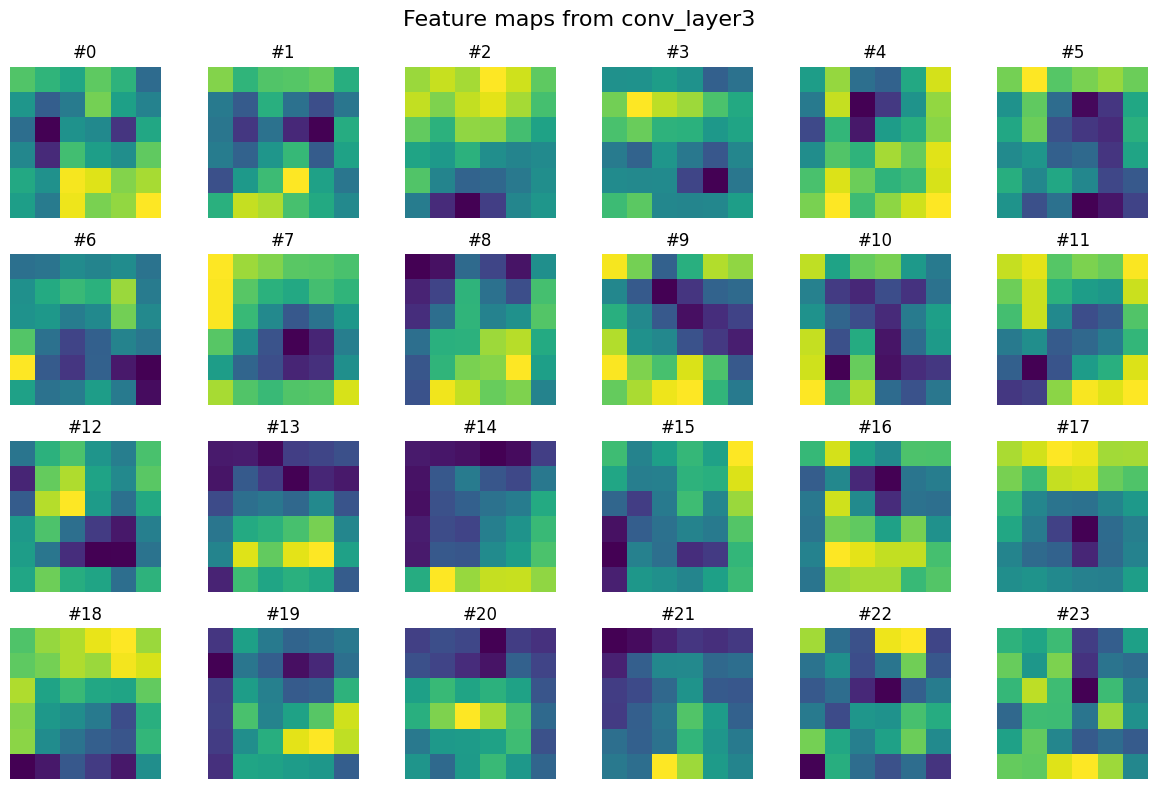

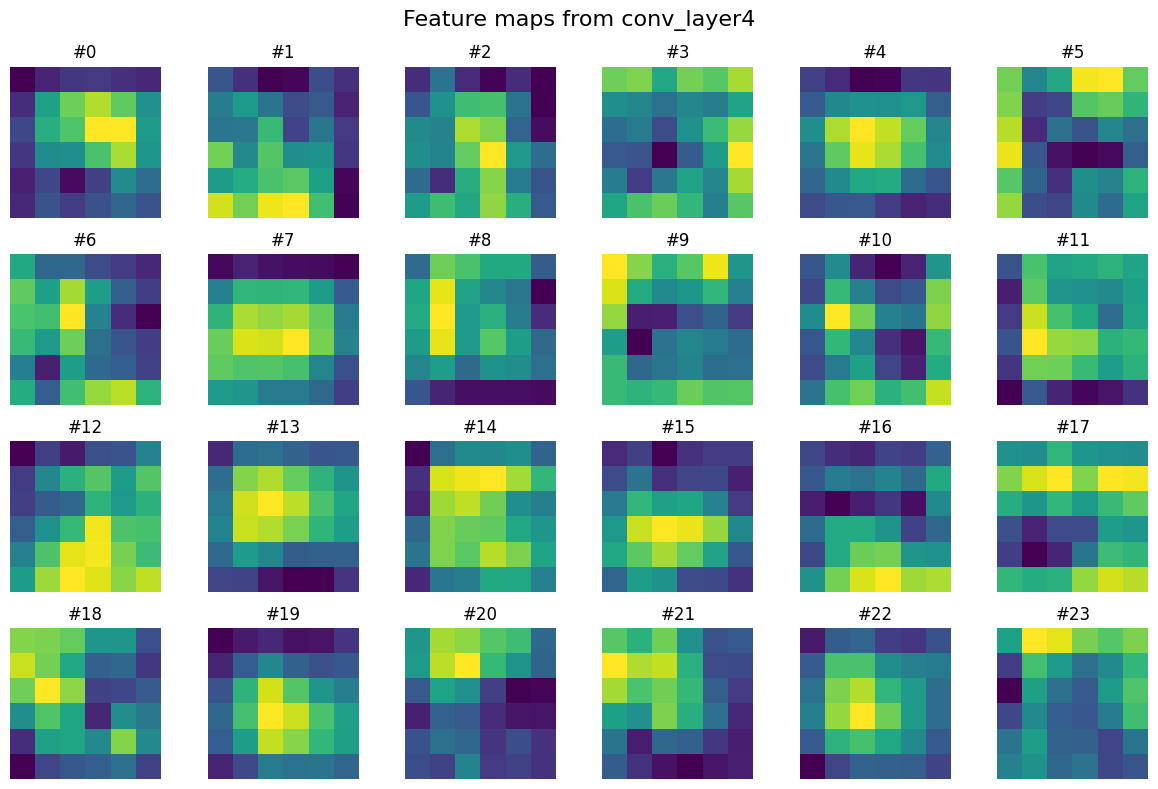

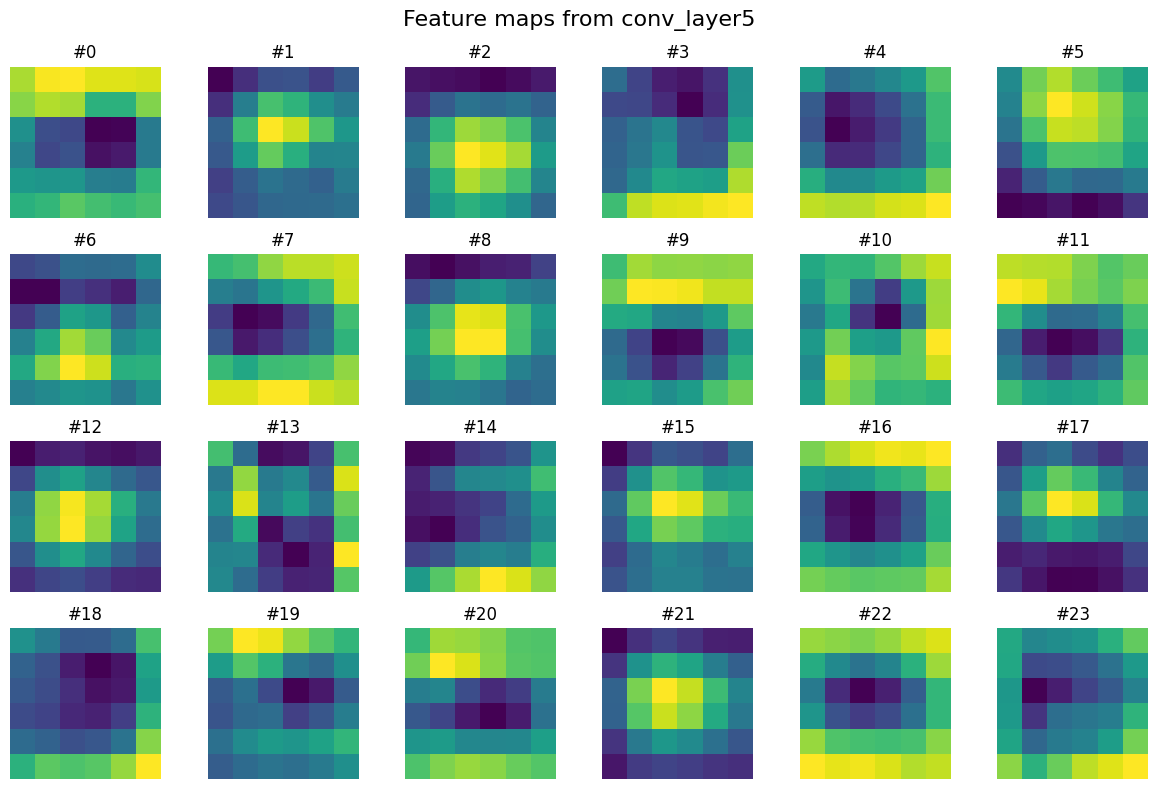

In [ ]:
# Visualization of features at different layers
import torchvision.transforms as T

to_tensor = T.ToTensor()

pil_img, _ = dataset_val[0]['img'], dataset_val[0]['label']

input_tensor = to_tensor(pil_img).unsqueeze(0).to(device)

activations = {}
def get_activation(name):
    def hook(model, input, output):
        activations[name] = output.detach().cpu()
    return hook

for layer_name in ['conv_layer1','conv_layer2','conv_layer3','conv_layer4','conv_layer5']:
    getattr(model, layer_name).register_forward_hook(get_activation(layer_name))

model.eval()
with torch.no_grad():
    _ = model(input_tensor)

# Plot the feature map
for name, fmap in activations.items():
    num_filters = fmap.shape[1]
    cols = 6
    rows = min((num_filters + cols - 1) // cols, 4)
    fig, axes = plt.subplots(rows, cols, figsize=(cols*2, rows*2))
    fig.suptitle(f'Feature maps from {name}', fontsize=16)
    for i in range(rows * cols):
        r, c = divmod(i, cols)
        ax = axes[r, c] if rows > 1 else axes[c]
        if i < num_filters:
            ax.imshow(fmap[0, i], cmap='viridis')
            ax.set_title(f'#{i}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()


We can see that the model made mostly correct predictions, despite the image quality was low that even human may have difficulty to correctly classify. This somewhat shows the advantage of CNNs over humans when confronted with complex, blurry images, but CNNs have more applications than that. They power a host of real-world applications, from enabling your smartphone’s camera to automatically recognize faces and apply portrait effects, to guiding autonomous vehicles by detecting pedestrians, road signs, and lane markings in real time. In healthcare, CNNs help radiologists spot tumors in MRI and CT scans, and dermatologists classify skin lesions from photos. They underpin optical character recognition for digitizing handwritten forms, fuel quality-control systems that spot manufacturing defects on assembly lines, and even drive wildlife monitoring by identifying animals in camera-trap images.

This technology is also reshaping some humanities and social science research. For example, in archaeology, CNNs are being used to categorize, complete, and translate broken clay tablets and cuneiform texts; in art history, CNNs are being used to study the pigments and materials used in paintings, as well as the expressions and gestures of the figures in them; and in anthropology, CNNs are being used to distinguish between human races and complex kinships. It is for this reason that we are here to introduce it to you! I hope you enjoyed the class and got something different out of it!

### Key takeaways from this part:

1. **Artificial Neural Networks (ANNs)** are programs or models that make decisions in a similar manner to the thought process of a human brain. 
2. **Convolutional Neural Networks (CNNs)** differ from other neural networks in the **convolutional layer** that allows them to understand features from image input in a more efficient way.
3. **Architectures** are central in neural networks as they determine the ways how a model learn from the input features and thereby determine the model performance.
4. Machine Learning and CNNs are fun and practical in the field of humanities and social sciences!

### Additional Resources
- [MLU-EXPLAIN: Neural Networks](https://mlu-explain.github.io/neural-networks/): A website with straightforward explanation and interactive visualizations of neural networks (with some math and technical terms), including more professional terminologies and advanced concepts that we won't cover in this notebook. But if you find this notebook to be too light and really hope to learn more, this is a good place to go!
- [CNN Explainer](https://poloclub.github.io/cnn-explainer/): An interesting interactive tutorial that explains how CNN work in a more visual way (but you may also find the explanation a little too technical). Try it out! You can also upload your own images of interest to see how the neural network processes them and classify them. Do you get the same results as you expected? What can you say about it?

### References

- Pinecone. Embedding Methods for Image Search. <https://www.pinecone.io/learn/series/image-search>
- IBM. What is a neural network? <https://www.ibm.com/think/topics/neural-networks>
- IBM. What are convolutional neural networks? <https://www.ibm.com/think/topics/convolutional-neural-networks>
- Convolutional Neural Network From Scratch. <https://medium.com/latinxinai/convolutional-neural-network-from-scratch-6b1c856e1c07>
